In [9]:
Task Title:Sales Performance Analysis

Task Description: Analyze the sales data for a fictional company and provide insights based on the provided dataset.


SyntaxError: invalid syntax (2955482970.py, line 1)

In [18]:
import pandas as pd

In [19]:
#reading the data
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (1)\\train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [20]:
 Data Cleaning:
   - Check for and handle missing values in the dataset.
   - Ensure data types are correct for each column.


SyntaxError: invalid syntax (2175524714.py, line 1)

In [27]:
#identifying the missing values
missing_values = df.isnull().sum()
print(missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [29]:
# Removing rows with missing values
df_cleaned = df.dropna()
print("\nDataFrame after removing rows with missing values:")
print(df_cleaned)



DataFrame after removing rows with missing values:
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0 

In [31]:

df_cleaned = df.dropna(subset=['Postal Code'])
print(df_cleaned)



      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [33]:
missing_values = df.isnull().sum()
print(missing_values) 

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [35]:
 #Ensure data types are correct for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [37]:
2. Exploratory Data Analysis (EDA):

SyntaxError: invalid syntax (3372412233.py, line 1)

In [39]:
#Calculate basic statistics for the sales amount (mean, median, min, max).
df['Sales'].agg(['mean','median','min','max'])


mean        230.769059
median       54.490000
min           0.444000
max       22638.480000
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='Count'>

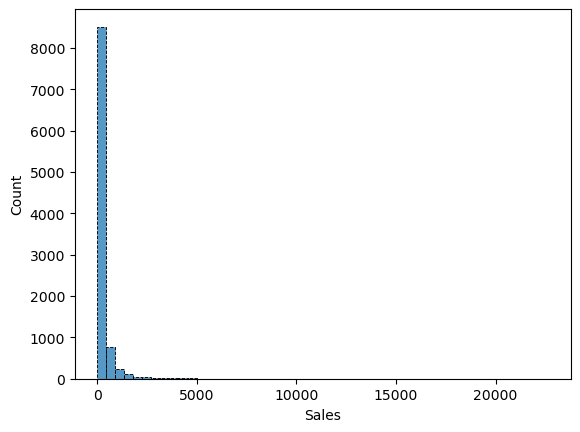

In [41]:
#Visualize the distribution of sales amounts using a histogram.
import seaborn as sns
sns.histplot(x='Sales',data=df,bins=50,edgecolor='black',lw=20,ls='--')

In [42]:
#Explore the relationship between sales and product categories using bar charts or other appropriate visualizations.
from matplotlib import pyplot as plt

NameError: name 'Sales' is not defined

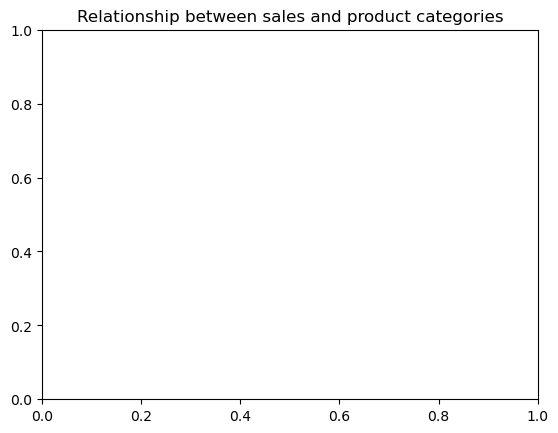

In [43]:
plt.xlabel=('Product Categories')
plt.ylabel=('Sales')
plt.title('Relationship between sales and product categories')
plt.bar(Sales,ProductID,label='Product ID')
plt.bar(Sales,ProductName,label='Product Name')
plt.legend()

<Axes: xlabel='Sales', ylabel='Category'>

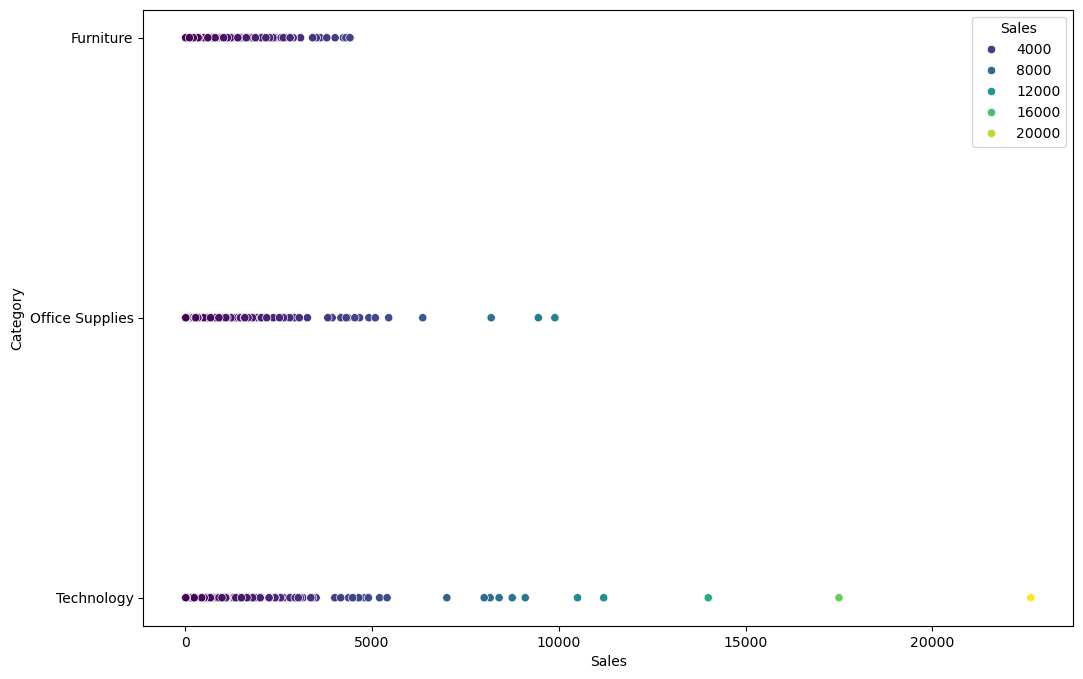

In [44]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='Sales',y='Category',data=df,palette='viridis',hue='Sales')

In [46]:
#Investigate any trends or patterns in sales over time using line plots or time series analysis.
# Aggregate sales by date
sales_over_time = df.groupby('Order ID')['Sales'].sum().reset_index()

# Line plot of sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Order ID'], sales_over_time['Sales'], marker='o', linestyle='-', color='b')
plt.xlabel('Order ID')
plt.ylabel('Total Sales (USD)')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


TypeError: 'str' object is not callable

Error in callback <function _draw_all_if_interactive at 0x00000273F167C540> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000273F35E0360> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [50]:
# Top-selling product categories
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Top-selling regions
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

print('Top-Selling Product Categories:')
print(top_categories)

print('Top-Selling Regions:')
print(top_regions)


Top-Selling Product Categories:
          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340
Top-Selling Regions:
    Region        Sales
0     West  710219.6845
1     East  669518.7260
2  Central  492646.9132
3    South  389151.4590


In [54]:
# Extract month and year from date
df['Order Date'] = df['Order Date'].dt.year
df['Ship Date '] = df['Ship Date '].dt.month

# Aggregate sales by month
sales_by_month = df.groupby('Ship Date ')['Sales'].sum().reset_index()

# Line plot of sales by month
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Ship Date '], sales_by_month['Sales'], marker='o', linestyle='-', color='g')
plt.xlabel('Ship Date ')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Sales Trends')
plt.grid(True)
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values